<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Scene Classification of Multiclass

## Kaggle dataset API
kaggle datasets download -d puneet6060/intel-image-classification

https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd

https://www.kaggle.com/puneet6060/intel-image-classification?source=post_page---------------------------

# Description

## Context


This is image data of Natural Scenes around the world.

This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0, 'forest' -> 1, 'glacier' -> 2, 'mountain' -> 3, 'sea' -> 4, 'street' -> 5 }

* The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction. 

## This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.



In [0]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"217f02c5aaee67783233d61f568be08d"}'}

In [0]:
! mkdir ~/.kaggle


In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
new-york-city/new-york-city-current-job-postings            New York City Current Job Postings                    3MB  2019-07-21 22:04:51           3774  
AnalyzeBoston/crimes-in-boston                              Crimes in Boston                                     10MB  2018-09-04 17:56:03           3308  
jealousleopard/goodreadsbooks                               Goodreads-books                                     632KB  2019-06-14 16:35:05           4229  
sudalairajkumar/chennai-water-management                    Chennai Water Management                             75KB  2019-06-19 03:42:44           3336  
wkirgsn/electric-motor-temperature                          Elec

In [6]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 337M/344M [00:03<00:00, 106MB/s]
100% 344M/344M [00:03<00:00, 104MB/s]


In [7]:
!unzip intel-image-classification.zip

Archive:  intel-image-classification.zip
  inflating: seg_train.zip           
  inflating: seg_test.zip            
  inflating: seg_pred.zip            


In [0]:
!mkdir TRAIN TEST PRED

In [0]:
#!unzip seg_train.zip -d TRAIN
#!unzip seg_test.zip  -d TEST
#!unzip seg_pred.zip  -d PRED

https://github.com/TomAllport/Intel-cnn/blob/master/cnn_intel.py

## Import Libraries

In [0]:
import numpy as np                          
import os                                  
from sklearn.metrics import confusion_matrix
import seaborn as sn                       
from sklearn.utils import shuffle    
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt            
import cv2                                  
import tensorflow as tf                   

## 6 categories that we have to classify.

In [0]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6


In [0]:
X_train = []
y_train = []

## Import Training data

## Import OpenCV  ,PILLOW Library

In [0]:
import cv2
from PIL import Image
import numpy as np

In [14]:
import os
IMG_PATH = 'TRAIN/seg_train'
os.listdir(IMG_PATH)

['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

In [0]:
for folder in os.listdir(IMG_PATH):
  image_path = os.path.join(IMG_PATH,folder)
  for image_name in os.listdir(image_path):
    image = cv2.imread(image_path+"/"+image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((150,150))
    X_train.append(np.array(image,dtype = 'float32'))
    y_train.append(class_names_label[folder])

In [16]:
len(X_train),len(y_train)

(14034, 14034)

In [17]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [18]:
X_train[0].shape

(150, 150, 3)

## Import Test data

In [0]:
X_test = []
y_test = []

In [20]:
IMG_PATH_TEST = 'TEST/seg_test'
os.listdir(IMG_PATH)

['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

In [0]:
for folder in os.listdir(IMG_PATH_TEST):
  image_path = os.path.join(IMG_PATH_TEST,folder)
  for image_name in os.listdir(image_path):
    image = cv2.imread(image_path+"/"+image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((150,150))
    X_test.append(np.array(image,dtype = 'float32'))
    y_test.append(class_names_label[folder])

In [22]:
len(X_test),len(y_test)

(3000, 3000)

## Format Prediction Data

In [0]:
X_pred = []

In [0]:
IMG_PATH_PRED = 'PRED/seg_pred'
for images in os.listdir(IMG_PATH_PRED):
  image =cv2.imread(IMG_PATH_PRED+"/"+images)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = Image.fromarray(image)
  image = image.resize((150,150))
  X_pred.append(np.array(image,dtype = 'float32'))

In [25]:
len(X_pred)

7301

##Build CNN Model

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

W0723 10:21:41.510875 140379810453376 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


##Compile the Model

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Summary

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

## Train  the model

In [30]:
xtrain = np.array(X_train)
xtrain.shape

(14034, 150, 150, 3)

In [31]:
xtest = np.array(X_test)
xtest.shape

(3000, 150, 150, 3)

In [0]:
train_images = xtrain/255.0 
test_images = xtest/255.0 

In [33]:
history = model.fit(train_images,y_train, batch_size=100, epochs=5, validation_data = (test_images,y_test),verbose=2)

Train on 14034 samples, validate on 3000 samples
Epoch 1/5
14034/14034 - 17s - loss: 1.3026 - acc: 0.4842 - val_loss: 1.3186 - val_acc: 0.4737
Epoch 2/5
14034/14034 - 14s - loss: 0.9460 - acc: 0.6411 - val_loss: 0.8723 - val_acc: 0.6763
Epoch 3/5
14034/14034 - 14s - loss: 0.7863 - acc: 0.7126 - val_loss: 0.7382 - val_acc: 0.7100
Epoch 4/5
14034/14034 - 14s - loss: 0.6760 - acc: 0.7529 - val_loss: 1.0083 - val_acc: 0.6617
Epoch 5/5
14034/14034 - 14s - loss: 0.5909 - acc: 0.7902 - val_loss: 0.6008 - val_acc: 0.7943


## Visualization of training accuracy and validation accuracy

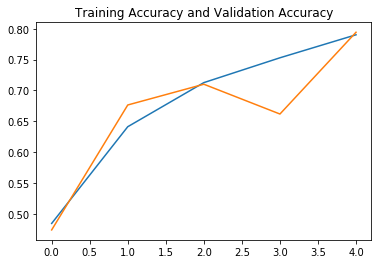

In [34]:
plt.plot(history.history['acc'],label='Training Accuracy')
plt.plot(history.history['val_acc'],label='Validation Accuracy')
plt.title('Training Accuracy and Validation Accuracy')
plt.show()

## Visualization of training loss and validation loss

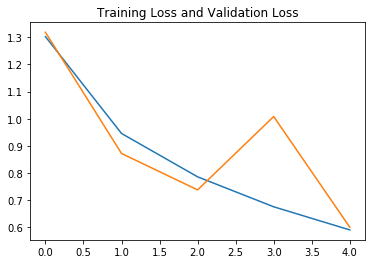

In [35]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training Loss and Validation Loss')
plt.show()